<a href="https://colab.research.google.com/github/SUBAPARVATHIM/Stock_Price_Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Minor_Project.csv")
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  


In [ ]:
data = df.filter(['Close'])
dataset = data.values
print("Dataset shape:", dataset.shape)

Dataset shape: (1009, 1)


In [ ]:
training_data_len = int(len(dataset) * 0.8)
print("Training data length:", training_data_len)

Training data length: 807


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print("Scaled data shape:", scaled_data.shape)

Scaled data shape: (1009, 1)


In [ ]:
try:
      train_data = scaled_data[0:training_data_len, :]
      print("Train data shape:", train_data.shape)
except Exception as e:
      print("Error in train_data assignment:", str(e))

Train data shape: (807, 1)


In [ ]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (747, 60)
y_train shape: (747,)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("x_train reshaped shape:", x_train.shape)

x_train reshaped shape: (747, 60, 1)


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

747/747 [==============================] - 24s 28ms/step - loss: 0.0033


In [ ]:
test_data = scaled_data[training_data_len - 60:, :]
print("Test data shape:", test_data.shape)

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
   x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print("x_test shape:", x_test.shape)

Test data shape: (262, 1)
x_test shape: (202, 60, 1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 1s 14ms/step


In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3.456225079971768


<ipython-input-27-5a1a7f6ca643>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


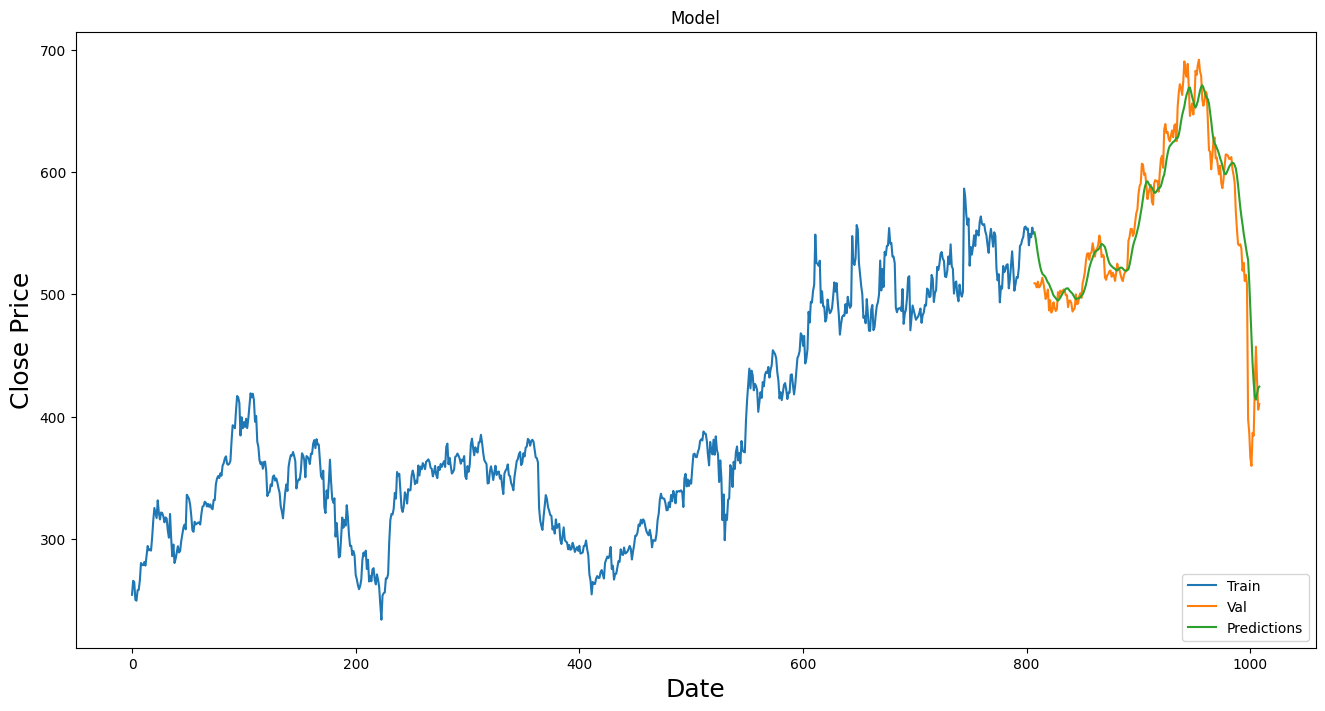

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()